In [158]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
module_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(module_path)
import pandas as pd
import scipy.signal as ss
import sys

import tools.data_reader as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing

In [65]:
#LOAD ECG DATA
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.ECG
phase = dr.Phases.BASE_REST
fs = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr)
# ha_ecg_freq = preprocessing.calculate_fft_data(ha_ecg, freq)
# la_ecg_freq = preprocessing.calculate_fft_data(la_ecg, freq)

In [ ]:
#LOAD WRIST DATA
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.WRIST_L
phase = dr.Phases.BASE_REST
fs = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_wr, la_wr = preprocessing.load_data(task, data_type, phase, convert_sr)

In [ ]:
# CALCULATE ECG METRICS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.SPEAKING
data_type = dr.DataTypes.ECG
phase = dr.Phases.SPEECH_EXPOSURE

fs = preprocessing.FS_DICT[data_type]
n_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

x, ha_ecg_mean = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="mean")
x, la_ecg_mean = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="mean")
x, ha_ecg_med = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="median")
x, la_ecg_med = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="median")
x, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft")
x, la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft")

No data values for participant at index 21; removing from list.
No data values for participant at index 20; removing from list.
No data values for participant at index 18; removing from list.
No data values for participant at index 13; removing from list.
No data values for participant at index 2; removing from list.
No data values for participant at index 1; removing from list.
No data values for participant at index 25; removing from list.
No data values for participant at index 13; removing from list.
No data values for participant at index 3; removing from list.
No data values for participant at index 2; removing from list.
No data values for participant at index 21; removing from list.
No data values for participant at index 20; removing from list.
No data values for participant at index 18; removing from list.
No data values for participant at index 13; removing from list.
No data values for participant at index 2; removing from list.
No data values for participant at index 1; re

C:\Users\zhoux\AppData\Local\Temp/ipykernel_21148/3068112193.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,7))


No data values for participant at index 25; removing from list.
No data values for participant at index 9; removing from list.
No data values for participant at index 25; removing from list.
No data values for participant at index 9; removing from list.


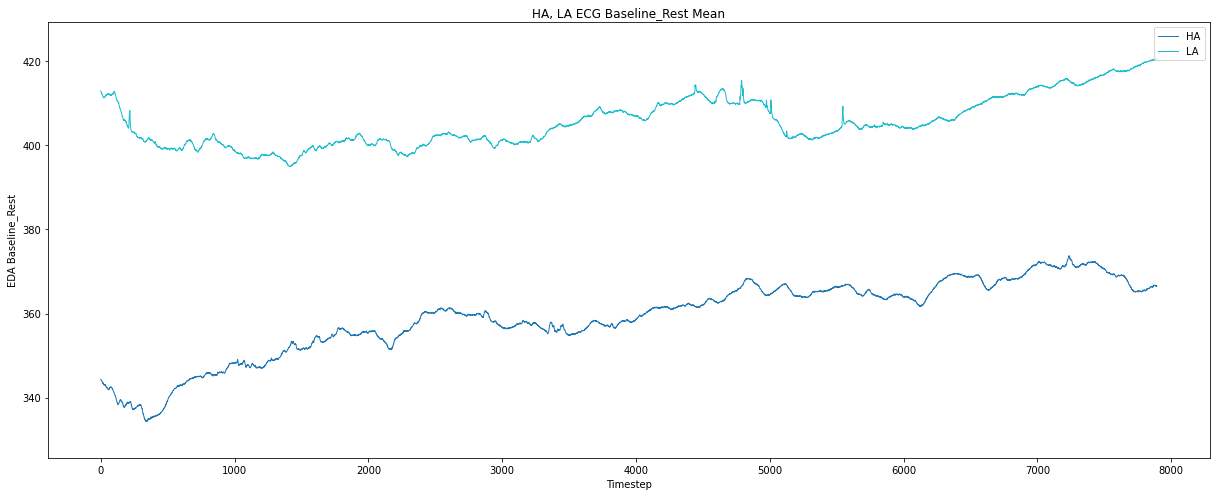

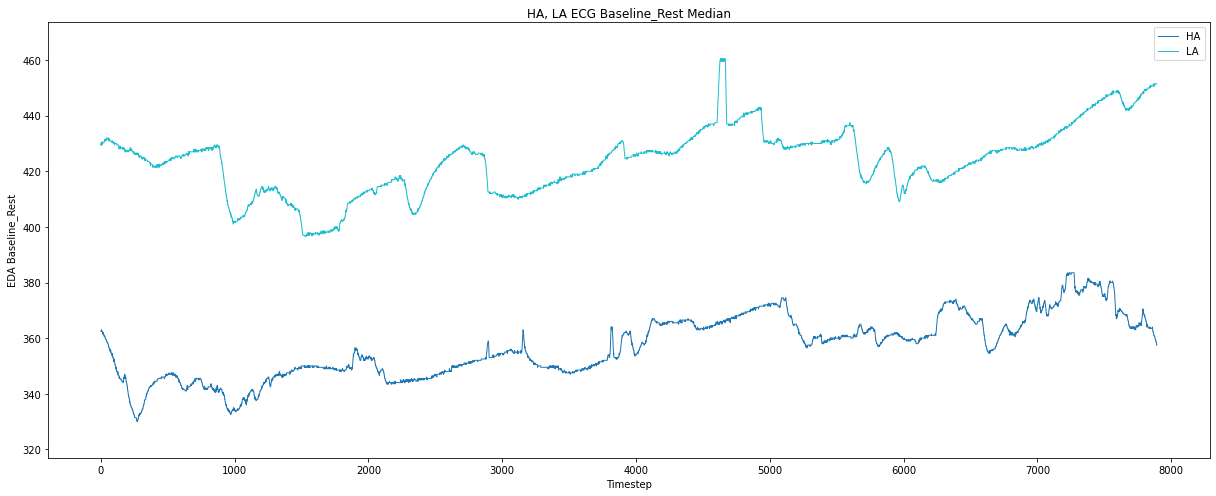

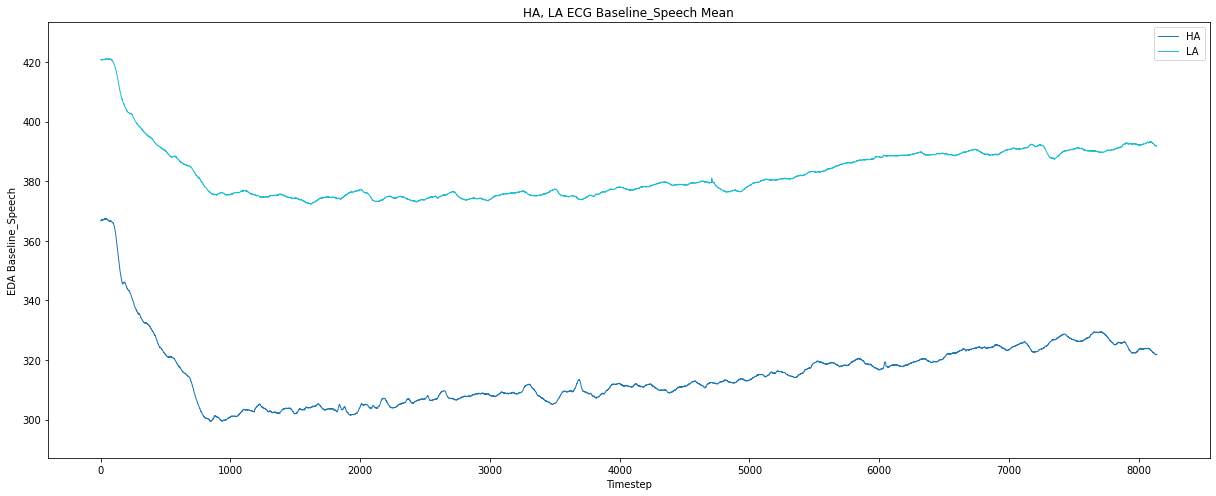

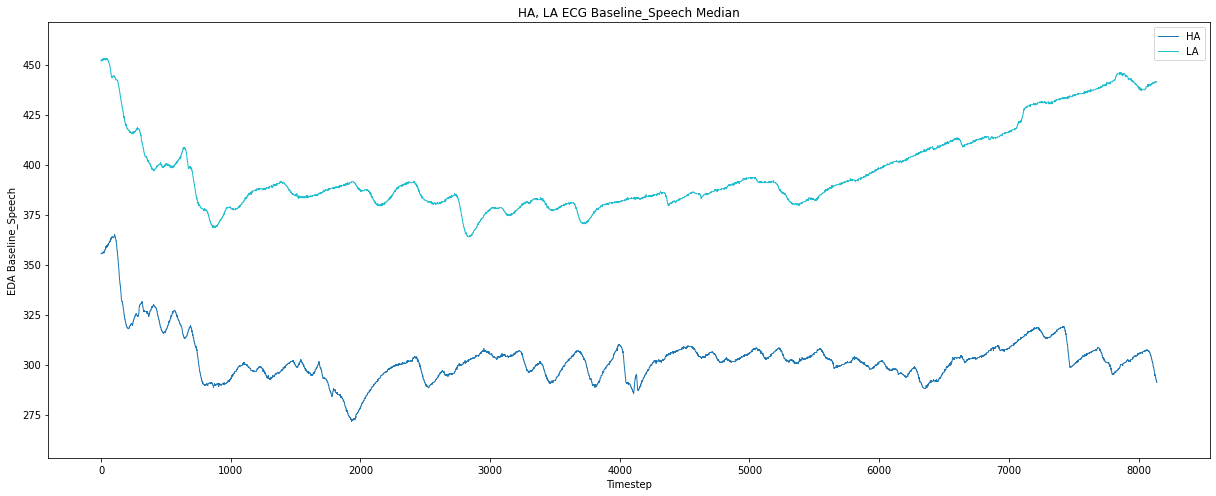

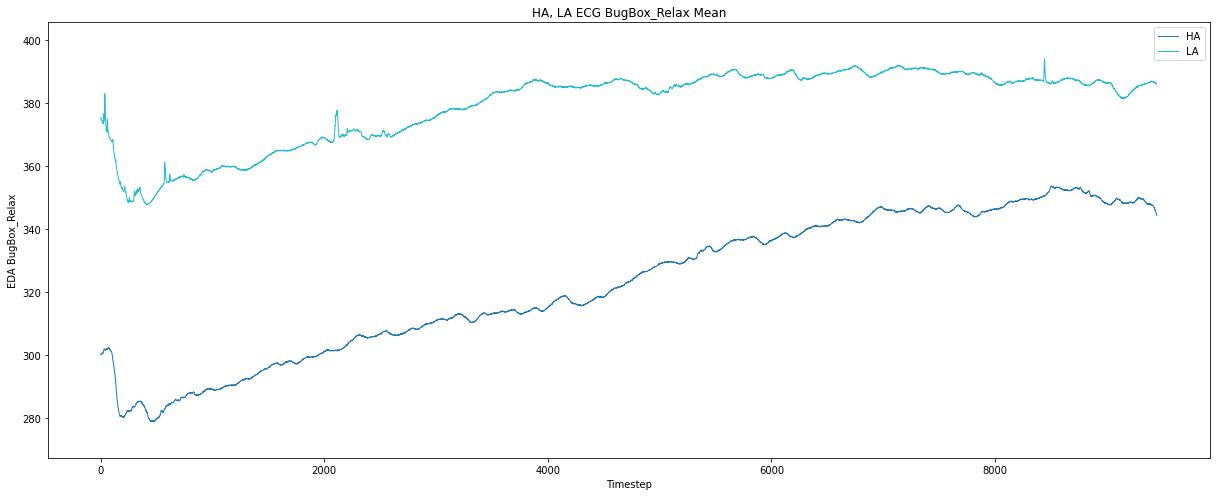

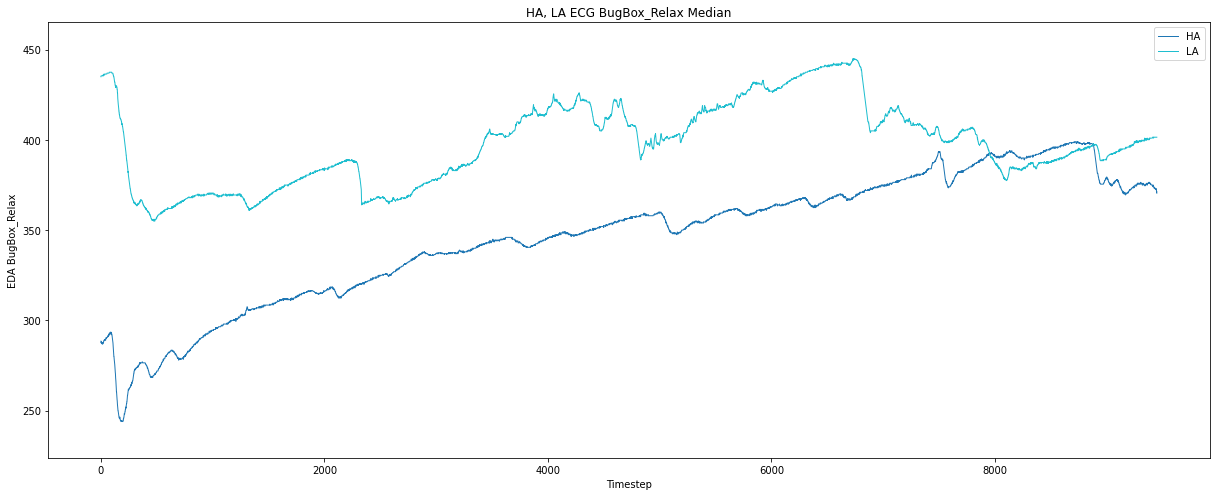

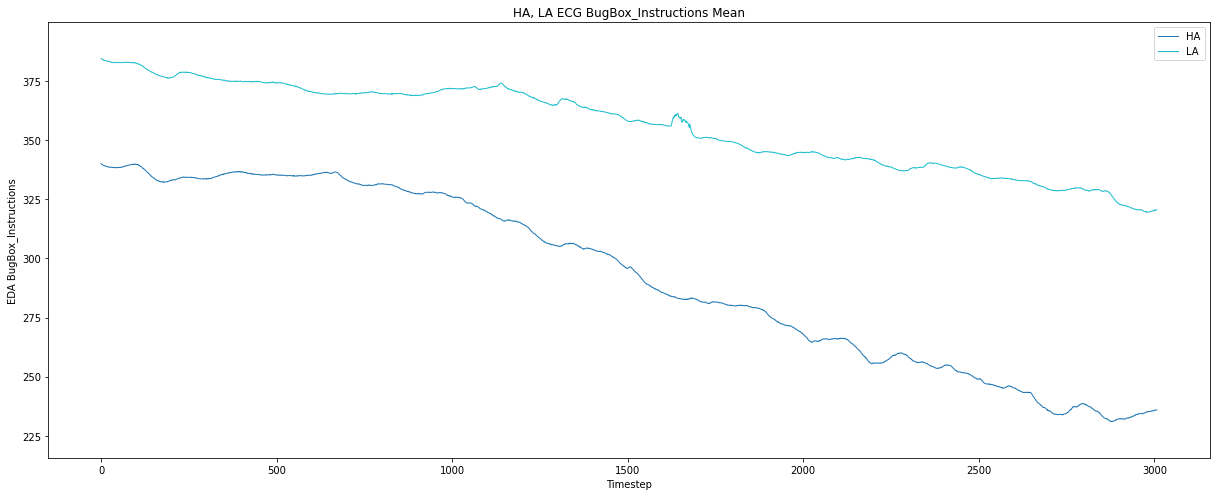

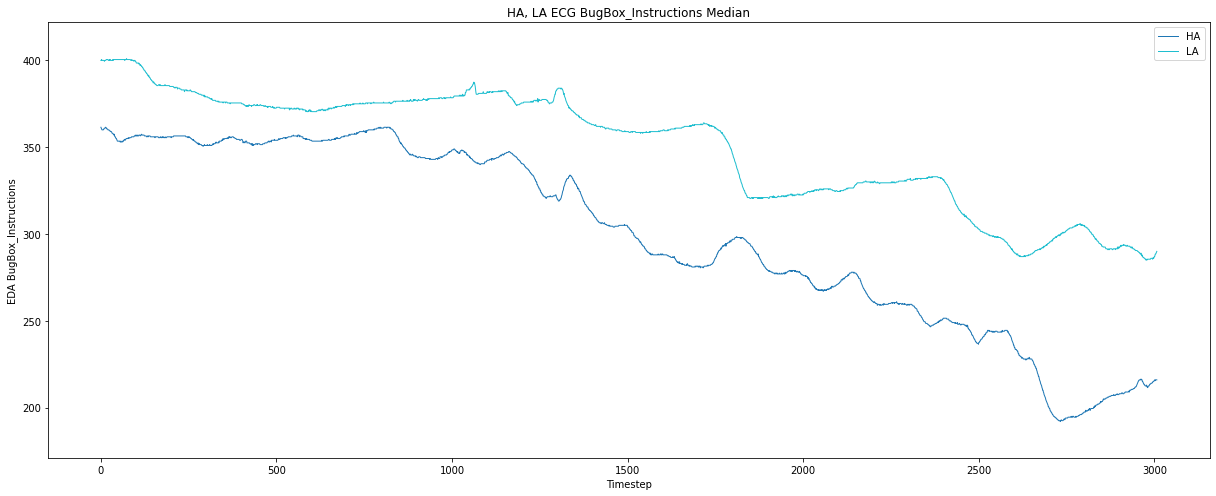

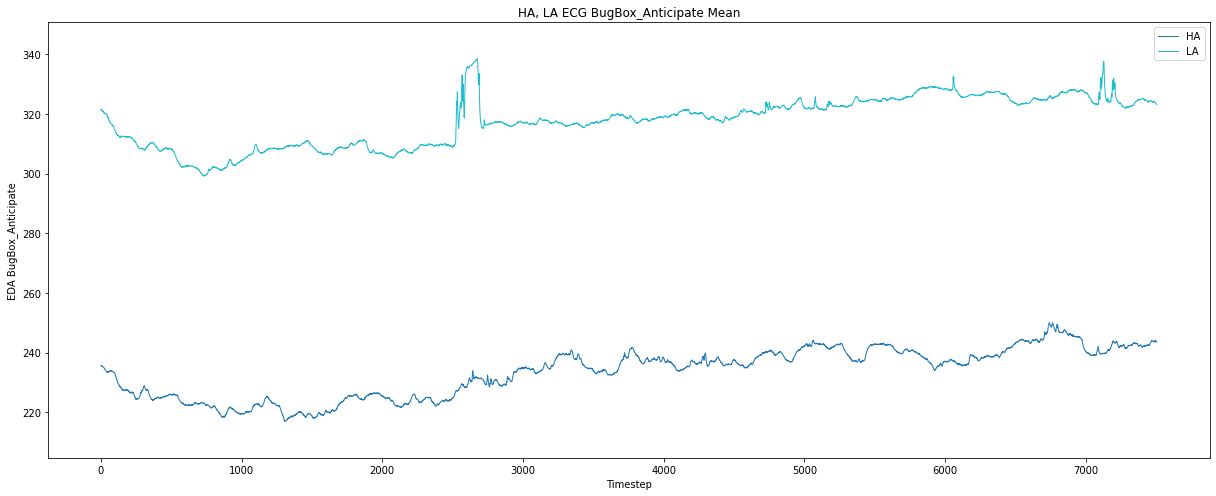

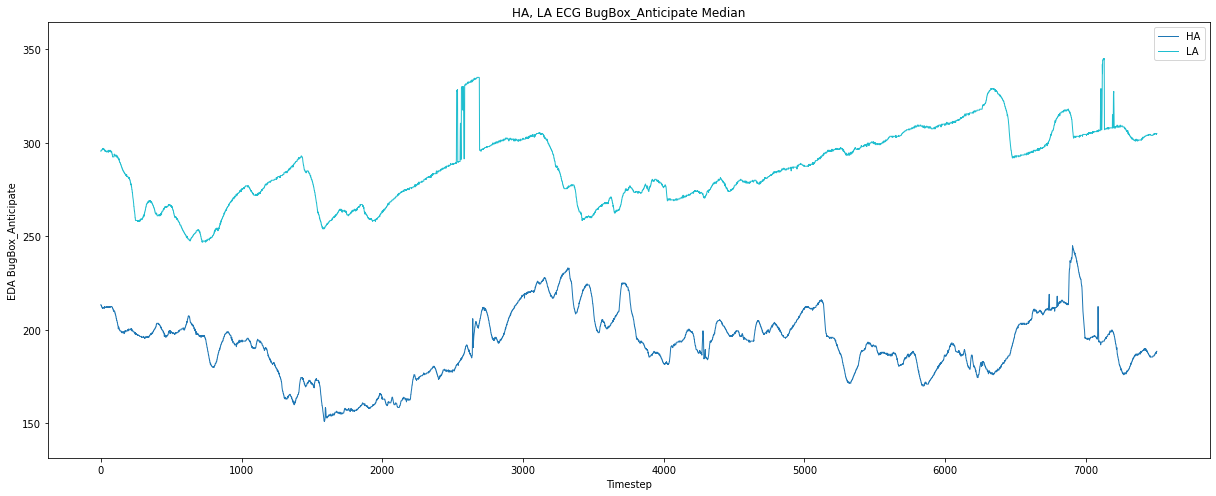

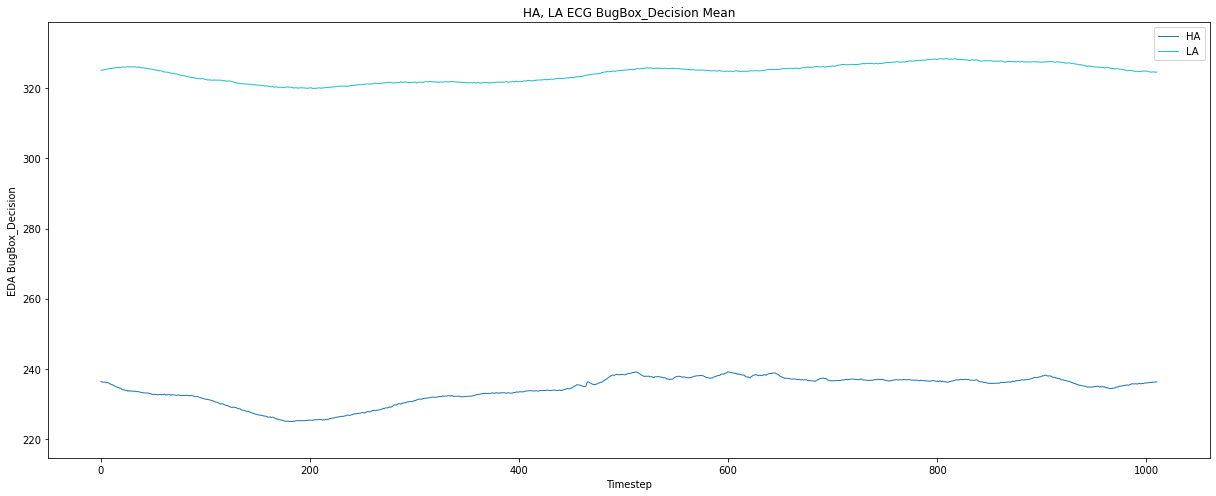

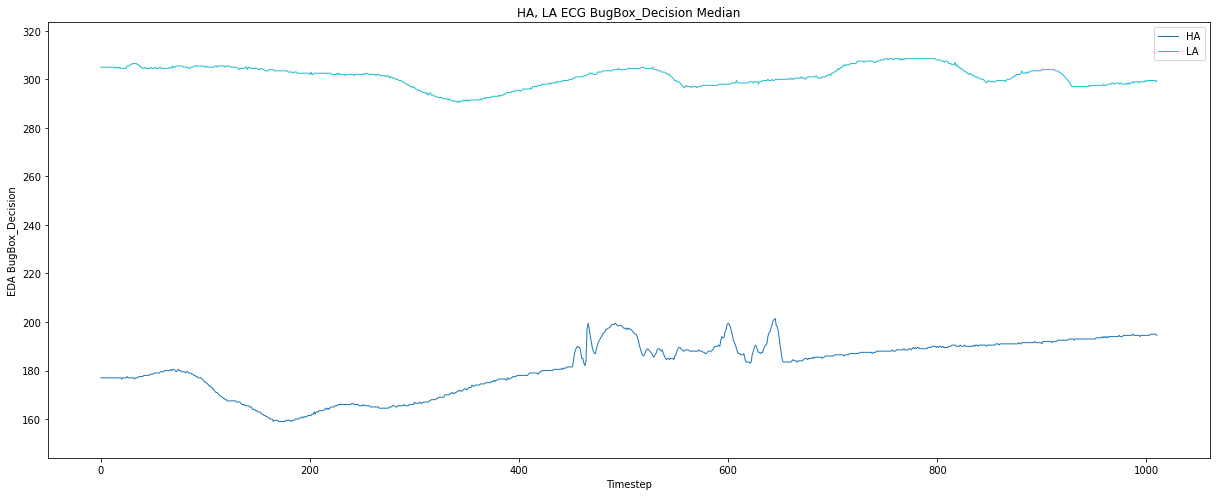

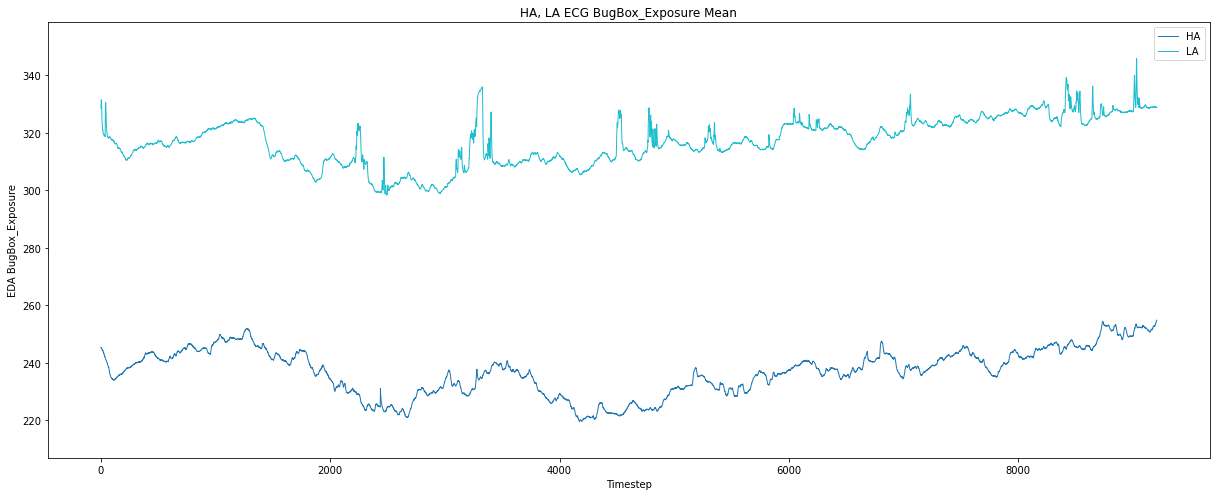

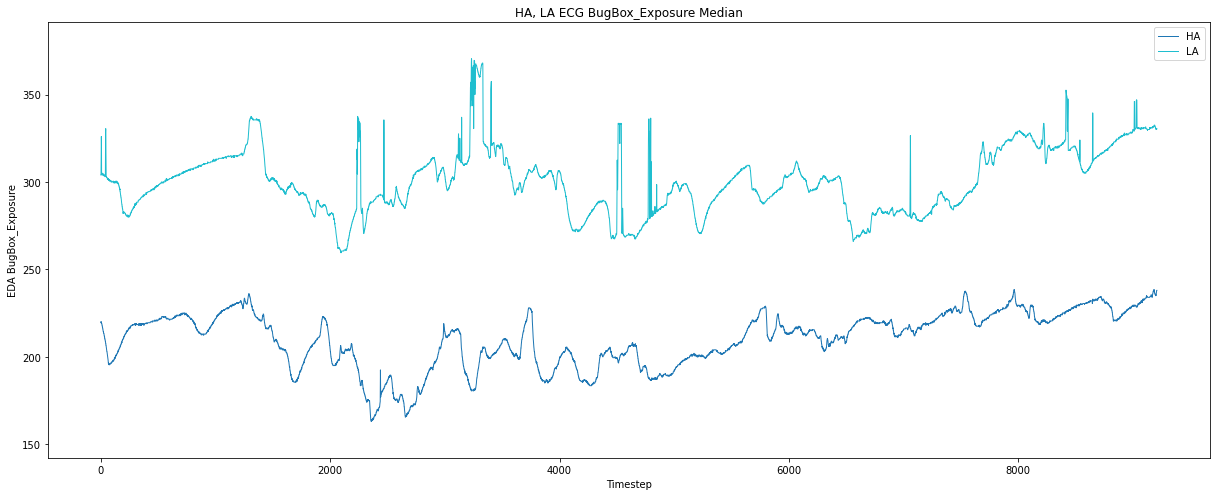

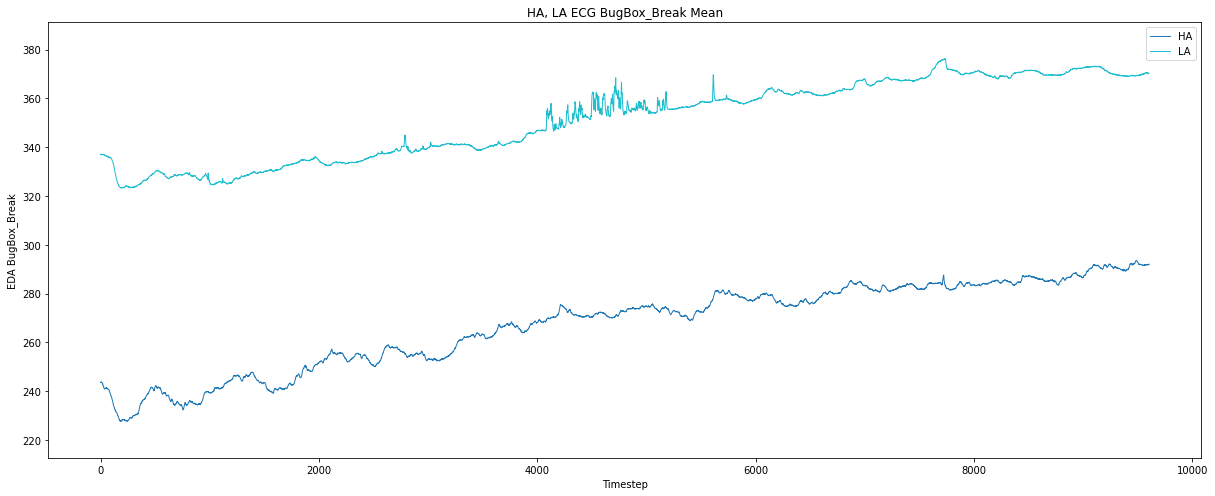

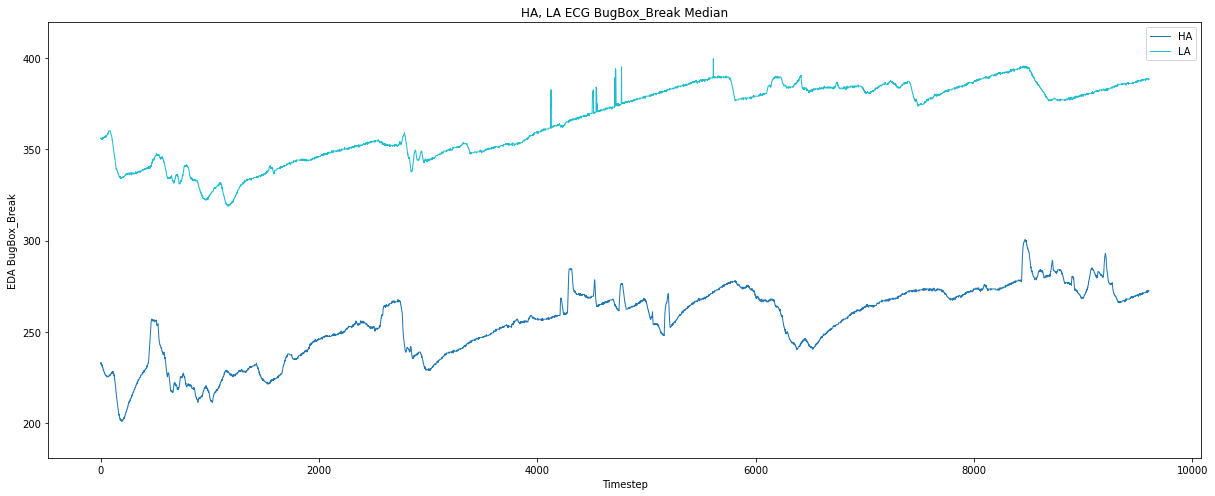

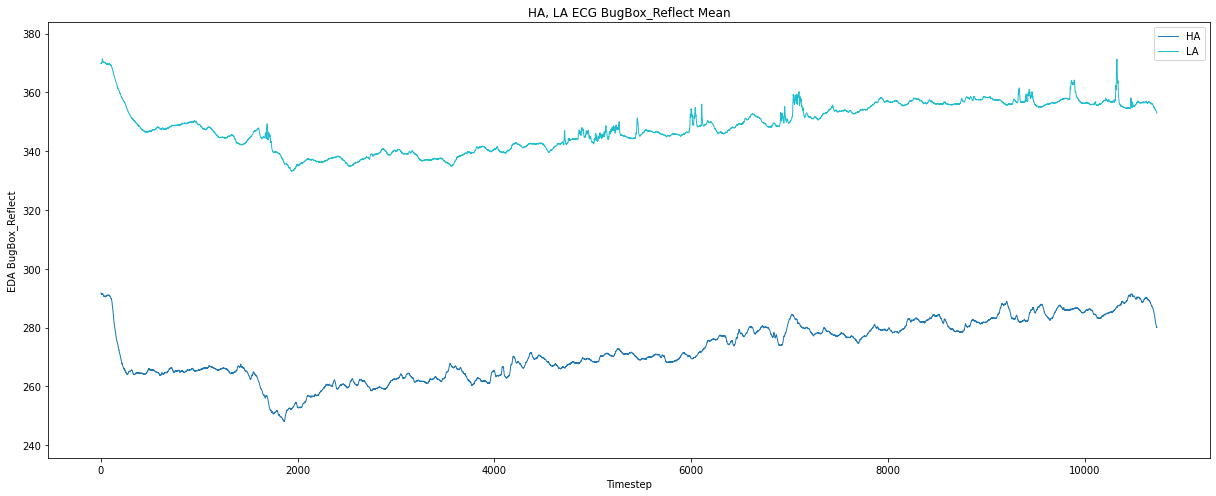

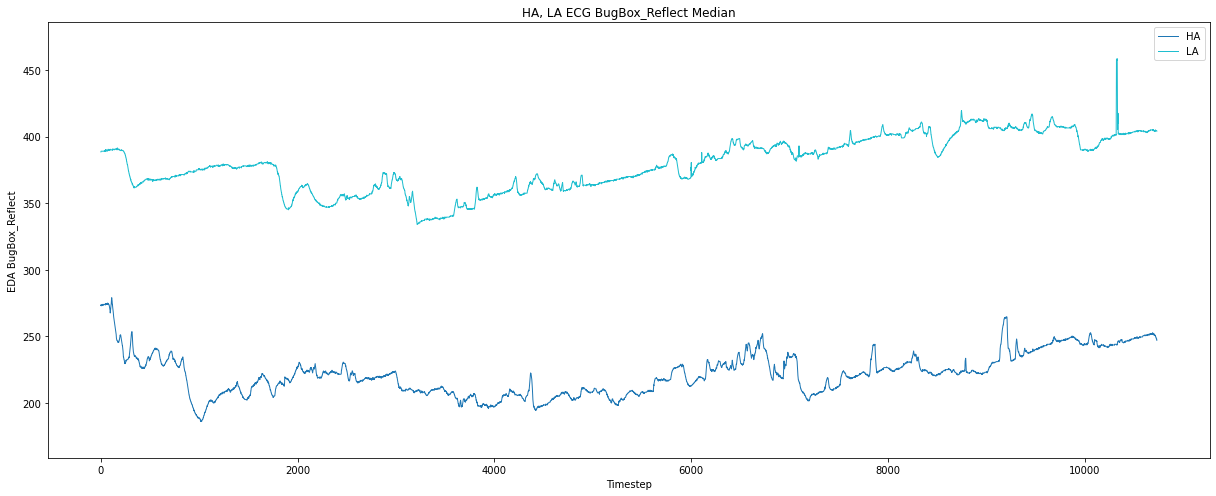

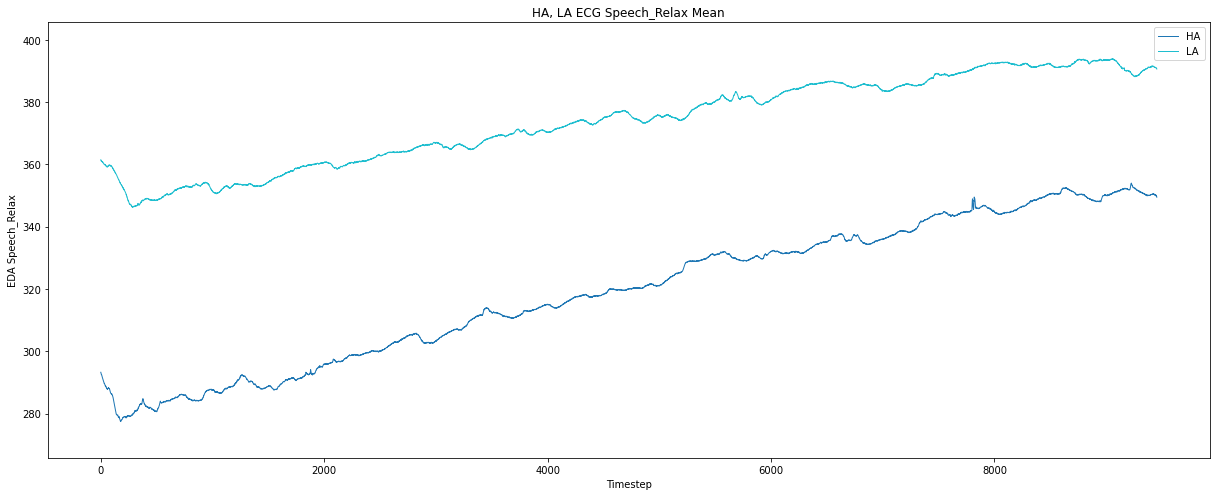

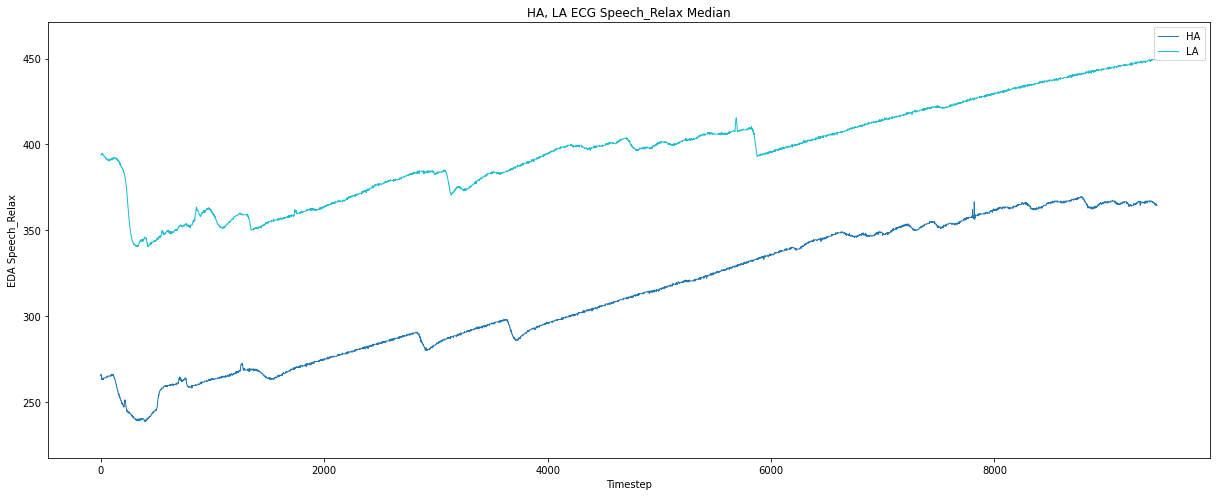

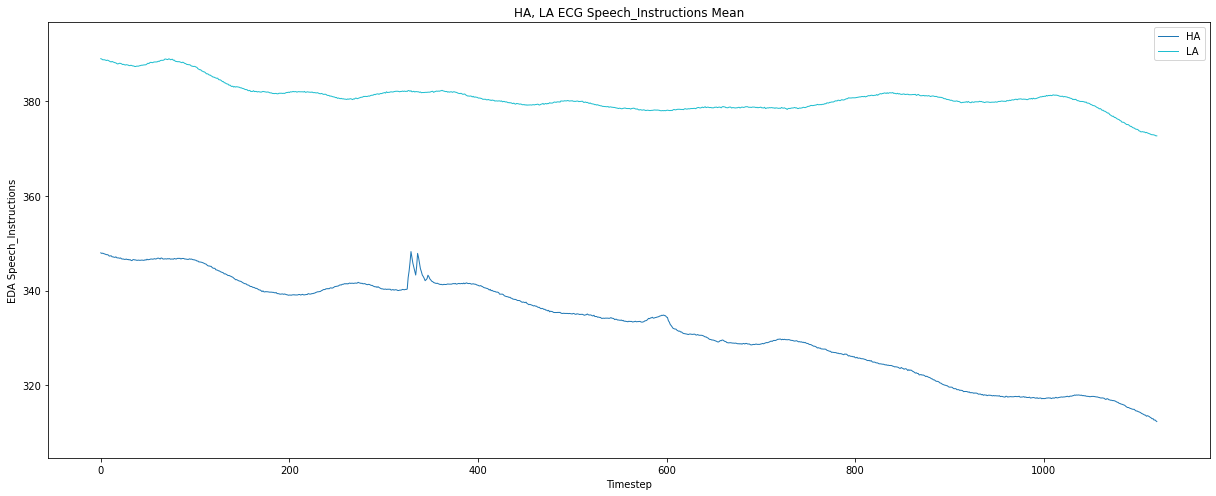

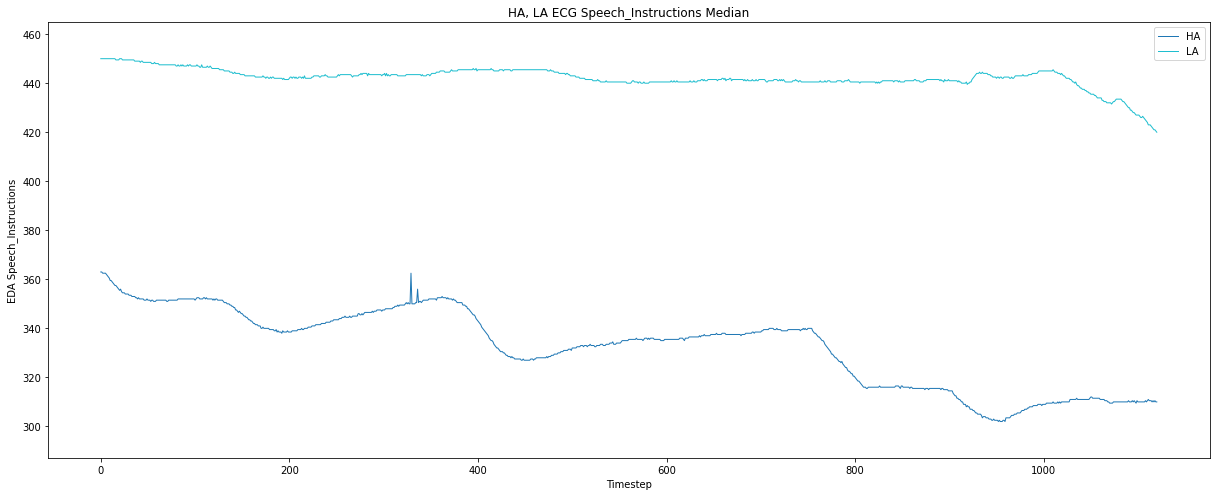

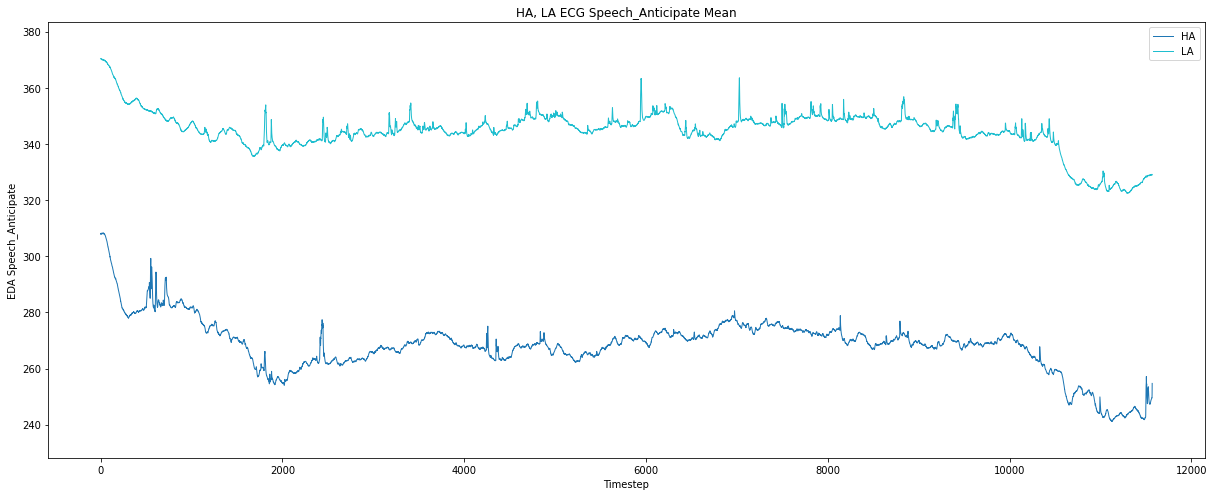

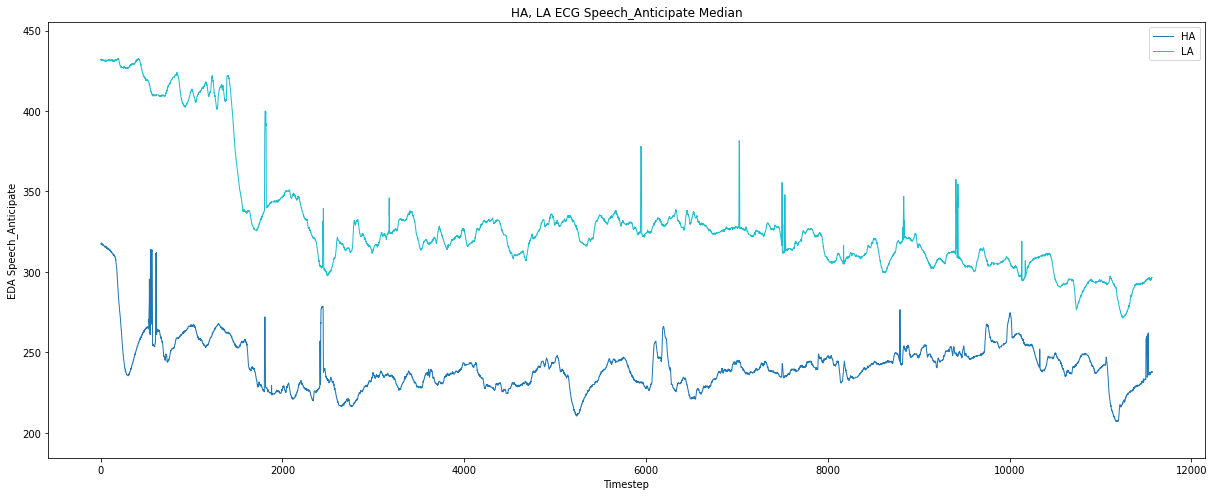

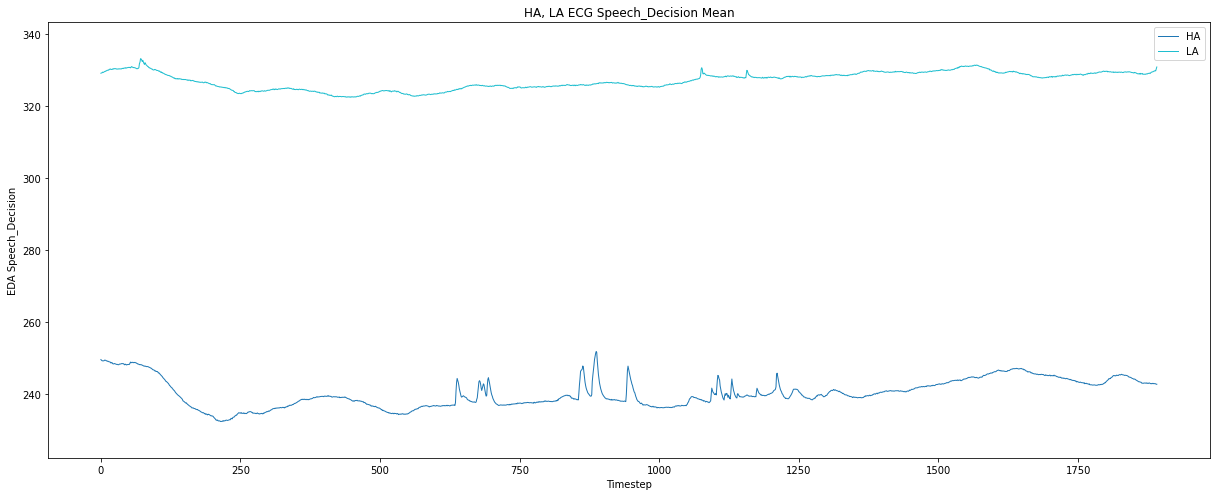

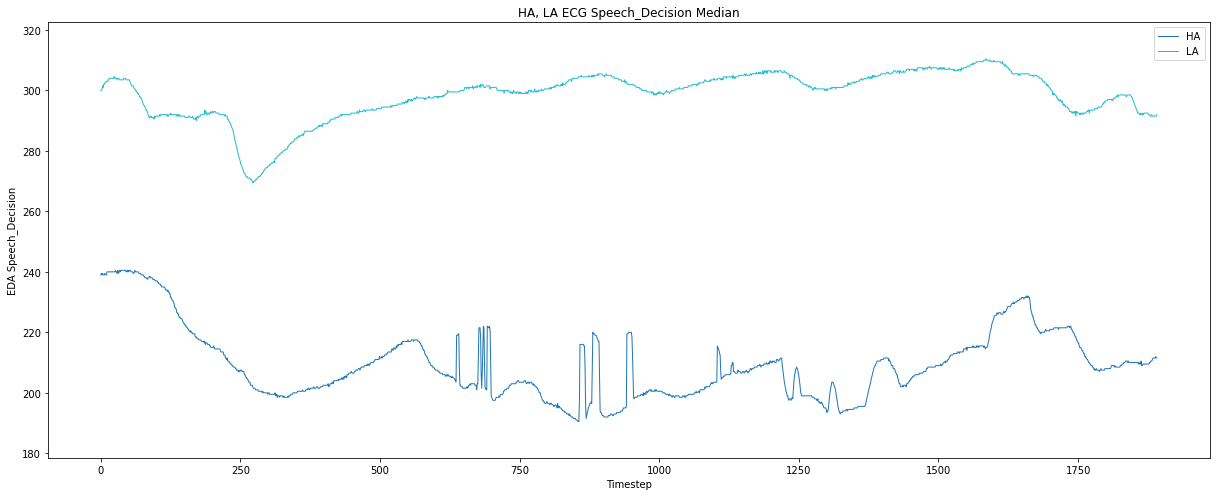

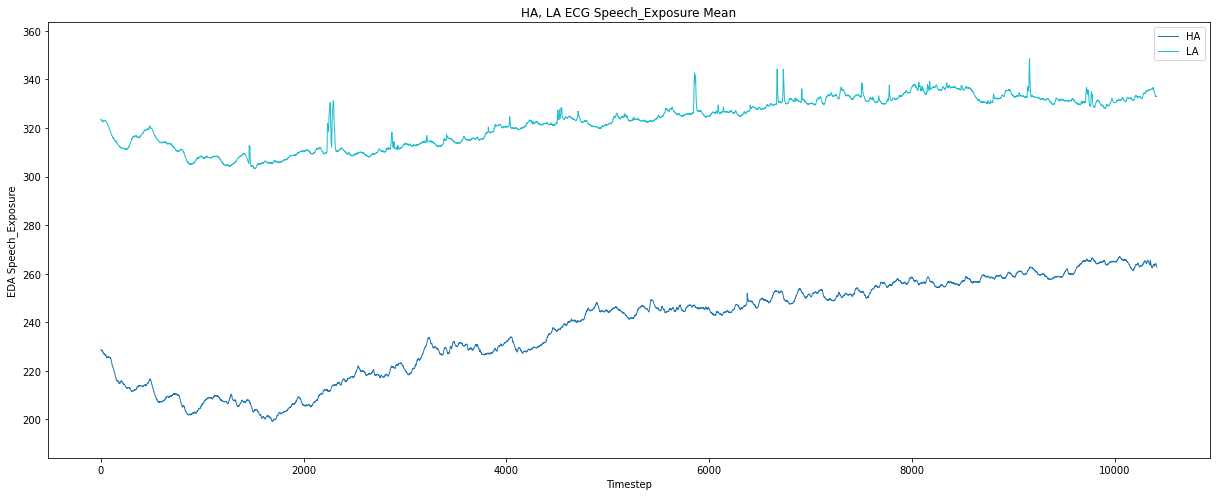

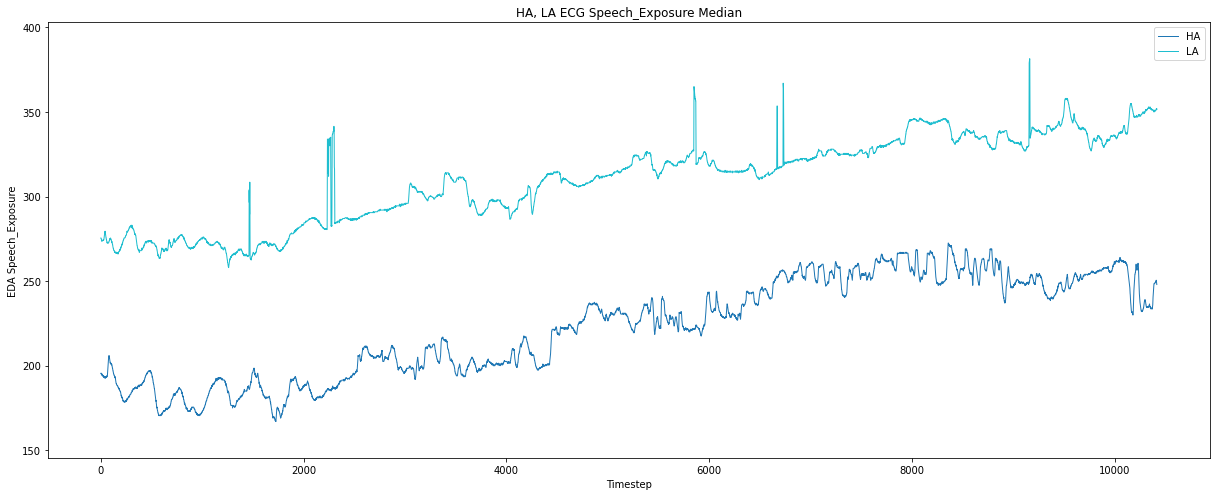

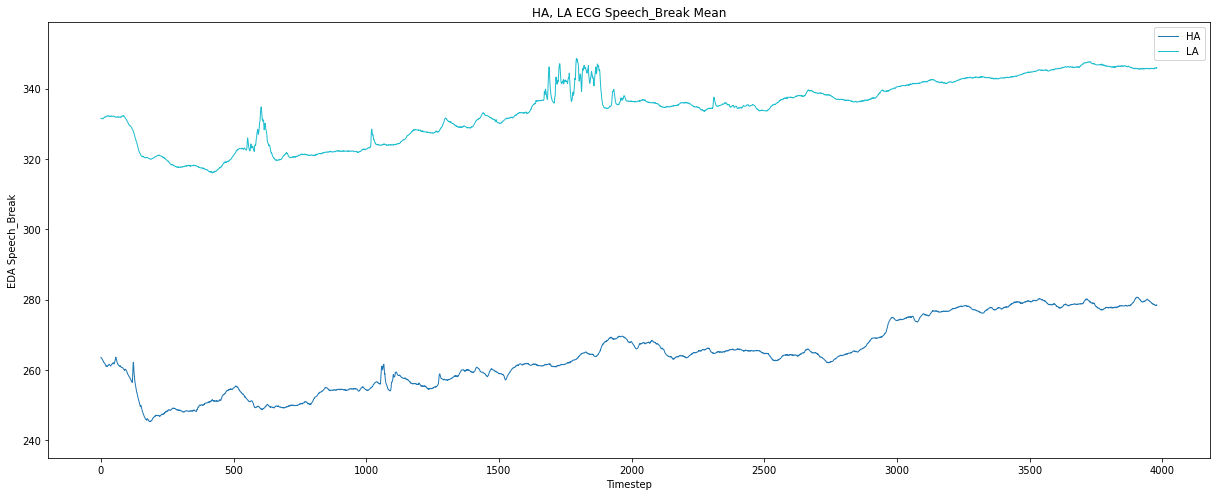

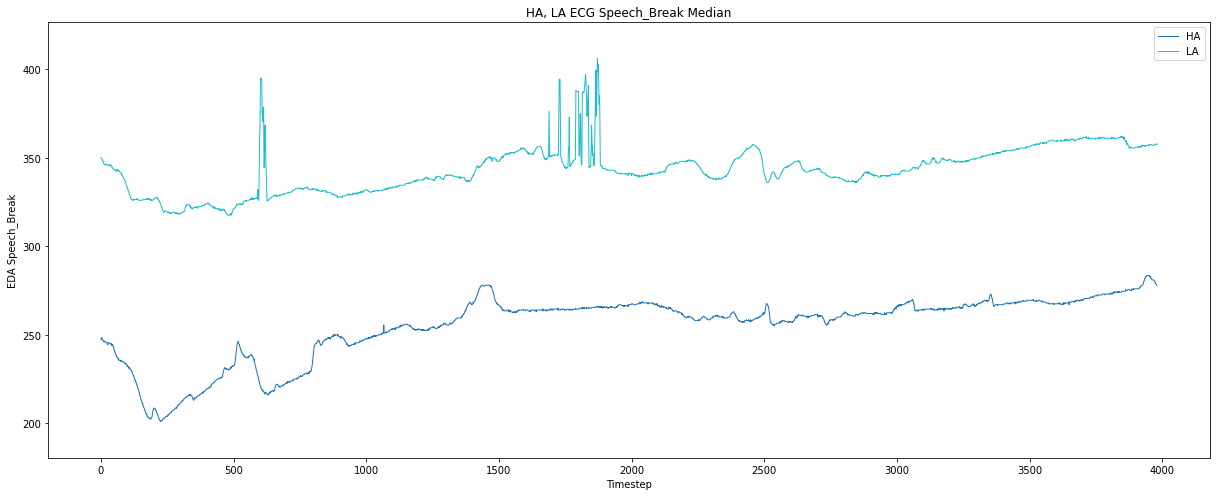

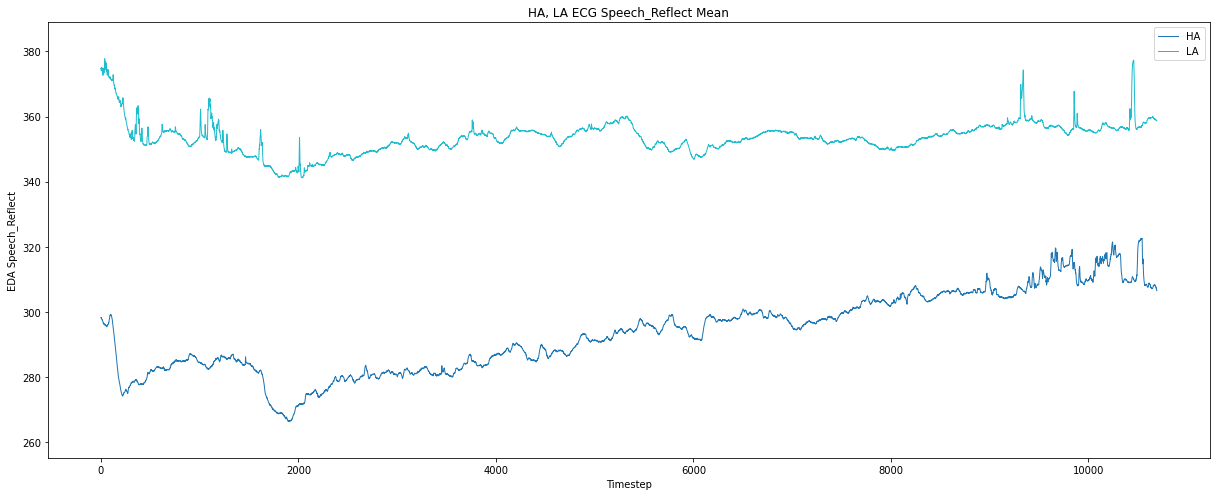

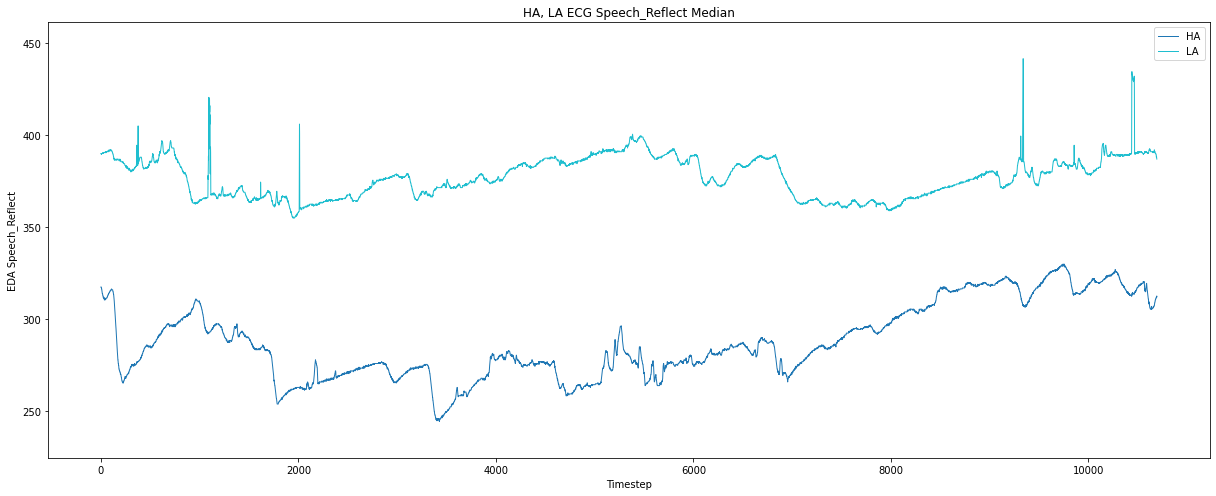

In [176]:
# COMPARE HA AND LA ECG METRICS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

colors = [
    '#1F77B4', '#9467BD', '#8C564A', 
    '#7F7F7F', '#1FBECF', '#E377C2', '#BCBD27'
]

convert_sr = False

# for data_type in [dr.DataTypes.ECG, dr.DataTypes.EDA]:
for data_type in [dr.DataTypes.EDA]:
    for task in [dr.Tasks.BASELINE, dr.Tasks.BUGS, dr.Tasks.SPEAKING]:

        if task == dr.Tasks.BASELINE:
            phases = [
                dr.Phases.BASE_REST, dr.Phases.BASE_SPEECH
            ]
        elif task == dr.Tasks.BUGS:
            phases = [
                dr.Phases.BUG_RELAX, dr.Phases.BUG_INSTRUCTIONS, dr.Phases.BUG_ANTICIPATE,
                dr.Phases.BUG_DECISION, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT
            ]
        else:
            phases = [
                dr.Phases.SPEECH_RELAX, dr.Phases.SPEECH_INSTRUCTIONS, dr.Phases.SPEECH_ANTICIPATE,
                dr.Phases.SPEECH_DECISION, dr.Phases.SPEECH_EXPOSURE, dr.Phases.SPEECH_BREAK, dr.Phases.SPEECH_REFLECT
            ]

        for phase in phases:
            fs = preprocessing.FS_DICT[data_type]
            n_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

            # MEAN
            try:
                x, data_1 = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="mean")
                x, data_2 = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="mean")
            except Exception as e:
                print(f"ERROR IN {phase}")
                raise e
                
            min_len = min(x.size, data_1.size, data_2.size)
            x = x[0:min_len]
            data_1 = data_1[0:min_len]
            data_2 = data_2[0:min_len]
            y1 = data_1.flatten()
            y2 = data_2.flatten()

            title = f"HA, LA ECG {phase} Mean"
            plt.figure(figsize=(17,7))

            plt.plot(x, y1, label="HA", color=colors[0], linewidth=1)
            plt.plot(x, y2, label="LA", color=colors[4], linewidth=1)
            plt.xlabel("Timestep")
            plt.ylabel(f"{data_type} {phase}")
            plt.legend(loc="upper right")
            plt.title(title)

            y_min = np.min([y1, y2])
            y_max = np.max([y1, y2])
            y_med = np.median([y_min, y_max])
            num_ticks = 20
            plt.ylim(y_min-(y_med-y_min)/5, y_max+(y_max-y_med)/5)
            plt.tight_layout()


            # MEDIAN
            x, data_1 = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="median")
            x, data_2 = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="median")
            min_len = min(x.size, data_1.size, data_2.size)
            x = x[0:min_len]
            data_1 = data_1[0:min_len]
            data_2 = data_2[0:min_len]
            y1 = data_1.flatten()
            y2 = data_2.flatten()

            title = f"HA, LA ECG {phase} Median"
            plt.figure(figsize=(17,7))

            plt.plot(x, y1, label="HA", color=colors[0], linewidth=1)
            plt.plot(x, y2, label="LA", color=colors[4], linewidth=1)
            plt.xlabel("Timestep")
            plt.ylabel(f"{data_type} {phase}")
            plt.legend(loc="upper right")
            plt.title(title)

            y_min = np.min([y1, y2])
            y_max = np.max([y1, y2])
            y_med = np.median([y_min, y_max])
            plt.ylim(y_min-(y_med-y_min)/5, y_max+(y_max-y_med)/5)
            plt.tight_layout()


In [ ]:
# COMPARE HA AND LA ECG FFT
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.WRIST_L
phase = dr.Phases.BASE_REST

colors = [
    '#1F77B4', '#9467BD', '#8C564A', 
    '#7F7F7F', '#1FBECF', '#E377C2', '#BCBD27'
]


# ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft mean")
# la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft mean")
x, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft")
x, la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft")


data_1 = np.take(ha_ecg_fft, indices=[0], axis=-1)  # fft
# data_1 = np.take(ha_ecg_fft, indices=np.arange(0, ha_ecg_fft.shape[-1], 1), axis=-1)  # fft mean
data_2 = np.take(la_ecg_fft, indices=[0], axis=-1)  # fft
# data_2 = np.take(la_ecg_fft, indices=np.arange(0, ha_ecg_fft.shape[-1], 1), axis=-1)  # fft mean

min_len = min(data_1.shape[0], data_2.shape[0])
data_1 = data_1[0:min_len, :]
data_2 = data_2[0:min_len, :]
title = f"HA, LA ECG {phase} FT"

x = x.flatten()
x = np.absolute(x)
y1 = np.abs(data_1[:, 1]).flatten()
y2 = np.abs(data_2[:, 1]).flatten()

freq_range = [0, x[-1]]
print(freq_range)

plt.figure(figsize=(17, 7))
plt.stem(x, y1, label="HA", linefmt=f"C0-", markerfmt=".")
plt.stem(x, y2, label="LA", linefmt=f"C1-", markerfmt=".")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")
plt.legend(loc="upper right")
plt.title(title)

y_min = np.min([y1, y2])
y_max = np.max([y1, y2])
y_med = np.median([y_min, y_max])
plt.xlim(freq_range[0], freq_range[1])
plt.ylim(0, y_max+(y_max-y_med)/5)
plt.tight_layout()
